In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv("Copper_Set.csv")

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.info()

### correct the data type

In [38]:
copper_df = pd.DataFrame(df)

date_columns = ['item_date', 'delivery date']
numeric_columns = ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']

for column in date_columns:
    copper_df[column] = pd.to_datetime(copper_df[column], format='%Y%m%d', errors='coerce').dt.date

for column in numeric_columns:
    copper_df[column] = pd.to_numeric(copper_df[column], errors='coerce')

In [39]:
#drop unwanted columns in df
copper_df.drop(columns=['material_ref'], inplace=True)

### skewness


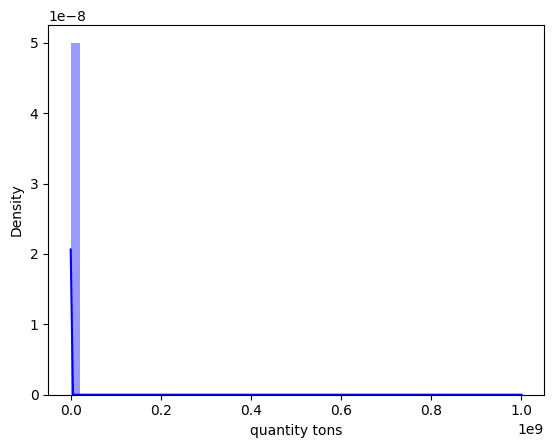

**************************************************************************


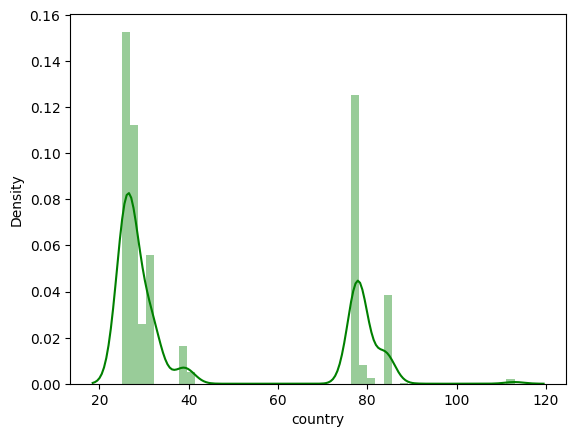

**************************************************************************


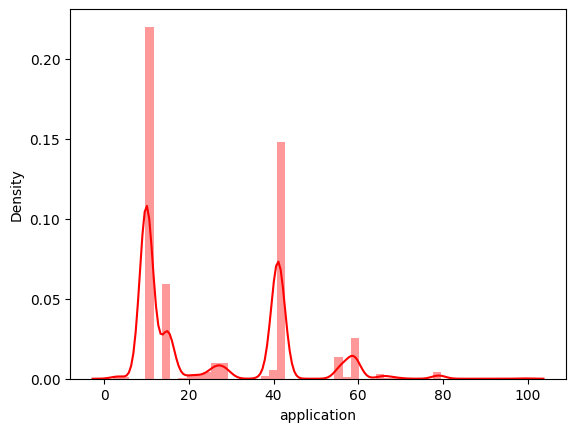

**************************************************************************


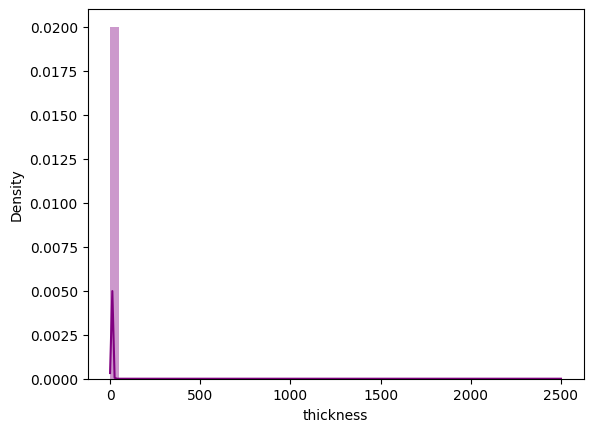

**************************************************************************


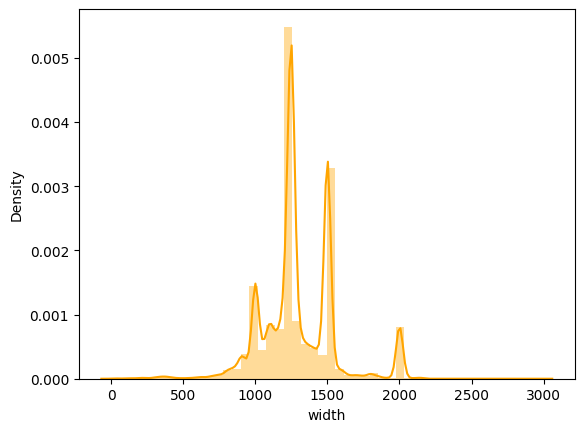

**************************************************************************


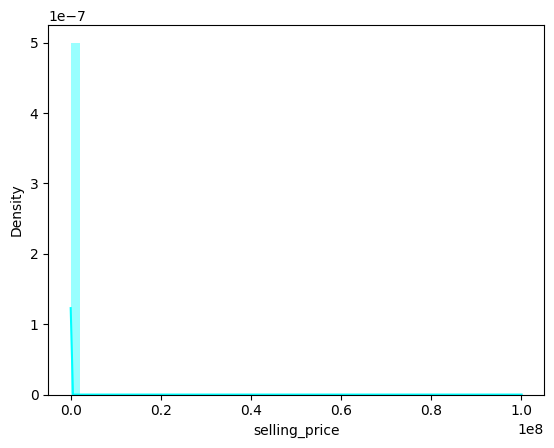

In [40]:
sns.distplot(copper_df['quantity tons'], color='blue')
plt.show()
print("**************************************************************************")
sns.distplot(copper_df['country'], color='green')
plt.show()
print("**************************************************************************")
sns.distplot(copper_df['application'], color='red')
plt.show()
print("**************************************************************************")
sns.distplot(copper_df['thickness'], color='purple')
plt.show()
print("**************************************************************************")
sns.distplot(copper_df['width'], color='orange')
plt.show()
print("**************************************************************************")
sns.distplot(copper_df['selling_price'], color='cyan')
plt.show()

In [ ]:
mask = copper_df['selling_price'] <= 0
print(mask.sum())
copper_df.loc[mask, 'selling_price'] = np.nan

mask = copper_df['quantity tons'] <= 0
print(mask.sum())
copper_df.loc[mask, 'quantity tons'] = np.nan

mask = copper_df['thickness'] <= 0
print(mask.sum())

copper_df.dropna(inplace=True)

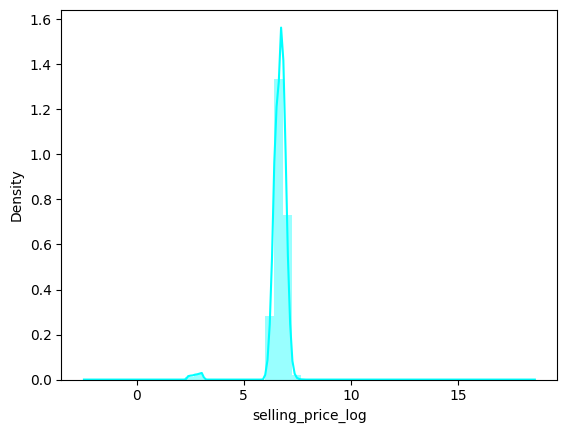

**************************************************************************


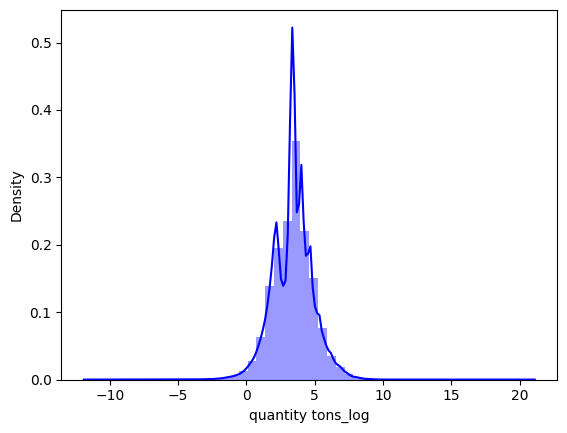

**************************************************************************


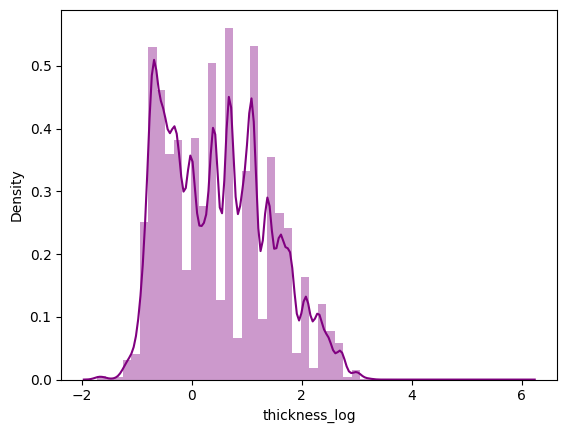

In [42]:
copper_df['selling_price_log'] = np.log(copper_df['selling_price'])
sns.distplot(copper_df['selling_price_log'], color='cyan')
plt.show()
print("**************************************************************************")
copper_df['quantity tons_log'] = np.log(copper_df['quantity tons'])
sns.distplot(copper_df['quantity tons_log'], color='blue')
plt.show()
print("**************************************************************************")
copper_df['thickness_log'] = np.log(copper_df['thickness'])
sns.distplot(copper_df['thickness_log'], color='purple')
plt.show()

In [43]:
x=copper_df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

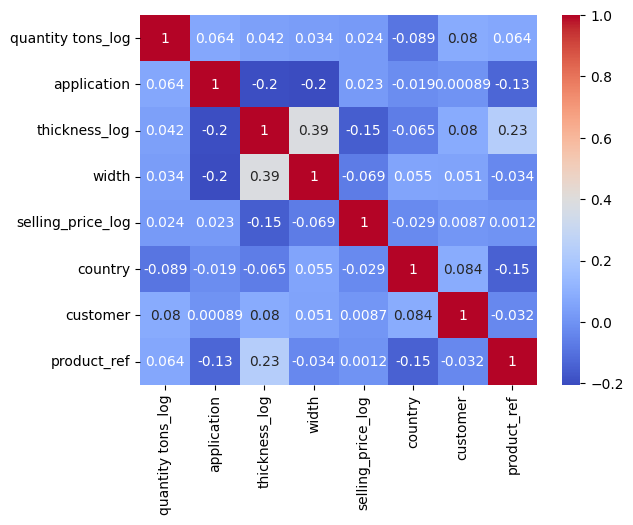

In [44]:
sns.heatmap(x, annot=True, cmap="coolwarm")

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [ ]:
X=copper_df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=copper_df['selling_price_log']

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# decision tree
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_ohe2 = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_ohe2), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

In [48]:
# Saving the model
import pickle
with open('C:/Users/study/Downloads/vscode/model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('C:/Users/study/Downloads/vscode/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('C:/Users/study/Downloads/vscode/t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('C:/Users/study/Downloads/vscode/s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)
print("All files saved Successfully")

All files saved Successfully


In [ ]:
df_c = copper_df[copper_df['status'].isin(['Won', 'Lost'])]
len(df_c)

In [ ]:
Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# concatenate after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[ 5698  1304]
 [ 1343 21741]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



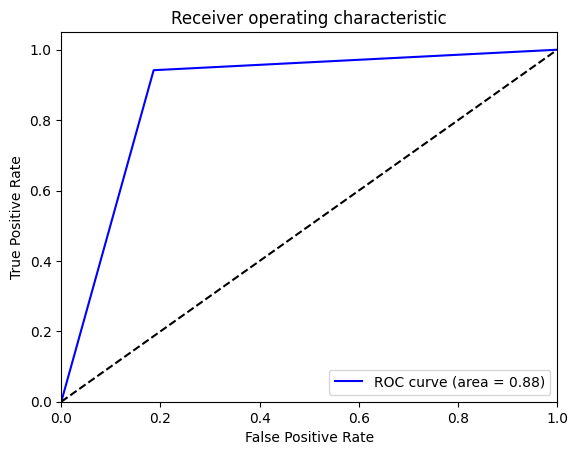

In [51]:
# Evalution Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predict the status for a new sample
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),350,18.0,302838,1670778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

In [53]:
# Saving the model
import pickle
with open('C:/Users/study/Downloads/vscode/cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('C:/Users/study/Downloads/vscode/cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('C:/Users/study/Downloads/vscode/ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)
print("All files are saved")

All files are saved
